# Lab 5: Detecting Breast Cancer — Understanding Logistic Regression 🔬



## Learning Objectives
* Understanding Logistic Regression and Probabilistic Classification
<!-- * Applying Linear Classification to Breast Cancer Prediction -->
<!-- * Model Evaluation and Error Analysis for Classification -->

## Outline
1. [Implementing Logistic Regression](#1.-Implementing-Logistic-Regression)
    1. [Preparing the Toy Dataset](#Preparing-the-Toy-Dataset)
    2. [Consolidating Model Parameters](#Consolidating-Model-Parameters)
    3. [Computing Class Probabilities](#Computing-Class-Probabilities)
    4. [Fitting the Model](#Fitting-the-Model)
    5. [Making Predictions](#Making-Predictions)
    6. [Visualizing the Result](#Visualizing-the-Result)
    7. [Evaluating the Model](#Evaluating-the-Model)

## This Week

Doctors at the Wash U Medical School need your help in finding a fast, reliable method of detecting the malignancy of breast cancer tumors for their patients. Thankfully, Dr. William H. Wolberg from the University of Wisconsin has provided a dataset of hundreds of `benign` and `malignant` cases at their hospital.

<img alt="fine needle aspirate" src="utility/pics/fna.jpg" />

Over the course of this week (lab and homework) we will be learning how to build an accurate classification model to perform this task. 

## Today's Lab

Today, we will begin by revising and implementing the logistic regression classifier using a toy data set. For evaluation we will introduce a new metric that are specific to classification.

## 1. Implementing Logistic Regression

Let's begin by deriving the componets of the logistic regression implementation step-by-step. Following best practice in software development, we will use a **small 2D toy dataset** for _development and debugging_. 

### Preparing the Toy Dataset

In [2]:
import numpy as np
from utility.util import load_toy

X, y = load_toy()

**Try this!** In the following cell, evaluate both `X` and `y` to get a sense for what the data looks like.

In [6]:
# your code here
print(X.shape)
print(y.shape)

(117, 2)
(117,)
[ 1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1 -1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1 -1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


**Write-up!** How many observations are there? How many features are there? What are the values in `y`? What real-world problems could this data set plausibly stand in for? Discuss with your neighbors and note your answers below.

Let's try to visualize the data that we are trying to model. First, run the following cell to get prettier plots.

In [7]:
from utility.util import configure_plots

configure_plots()

Plots configured! 📊


**Try this!** Create a scatter plot that shows `X` plotting $x_1$ vs. $x_2$. Then, scatter the points in two different colors, corresponding to positive and negative $y$ and/or with different marker shapes. Include appropriate axes labels, a legend, and a title. We created a similar plot in `Lab1`. Check your plot with your neighbors and a TA (for a quick sanity check). 
> Hint: You can make use of the `label` keyword argument of any `Matplotlib` plotting function with `plt.legend()` to automatically take care of your legend labels.

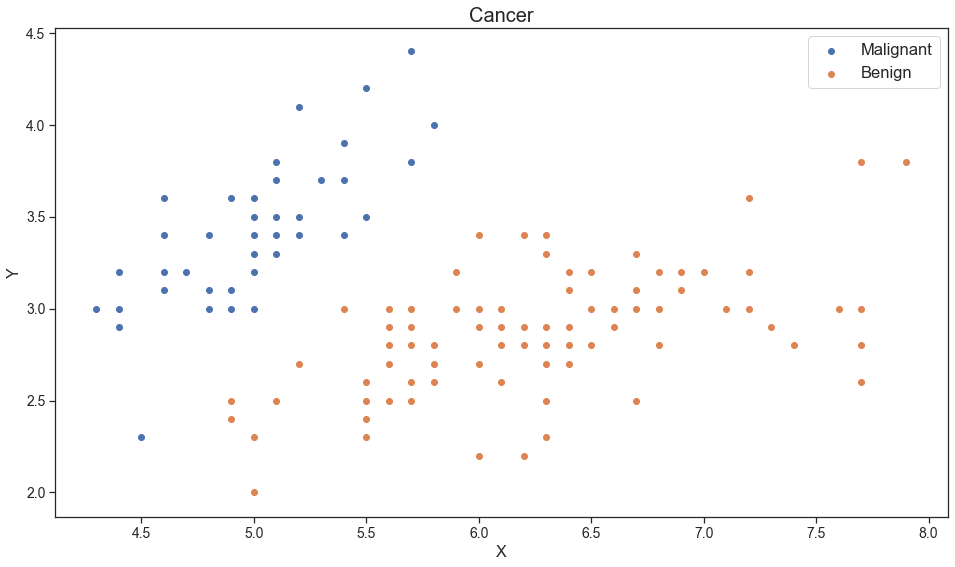

In [32]:
import matplotlib.pyplot as plt

# your code here
PosX1 = X[y>0, 0]
PosX2 = X[y>0, 1]
NegX1 = X[y<0, 0]
NegX2 = X[y<0, 1]
plt.scatter(PosX1, PosX2)
plt.scatter(NegX1, NegX2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Cancer")
plt.legend((ax1, ax2), ('Malignant', 'Benign'))

### Consolidating Model Parameters

Before we start we'll apply the trick of consolidating the mdoel parameters $b$ and $w$ as was described in lecture. In our discussions so far we have represented models with the general formula: $$y = wx + b.$$ In this representation, we notate $w$ and $b$ as distinct entities with separate names. However, it is also very common to see all of a models parameters referred to as a single unit called $\theta$, $\beta$, or $w$, amongst other names, depending on the context.

> _For the curious_: In statistics, it is common to see model parameters referred to as $\beta_0$, $\beta_1$, etc.; and, in ML, it is more common to see them referred to as $w_0$, $w_1$, etc.

This is a valid thing to do because the bias or constant term $b$ can be treated as just another parameter of the model. Practically, however, this means that we will need to change the way we define $w$ and $X$ in order to keep the math straight (and thenotation simple).

The way to do this is by prepending $b$ to our weights $w$ as $w_0$ so that,

$$w = [b, w_1, w_2, \ldots] = [w_0, w_1, w_2, \ldots].$$

Accordingly, we must also adjust $X$ in order to keep the math (via dot product) consistent. We can do this by adding a $1$ to each observation so that for each data point, $x_i$, we have $$x_i = [1, x_{i, 1}, x_{i, 2}, \ldots, x_{i, d}].$$

These adjustments result in

$$
\begin{align}
    y_i &= w^\top x_i \\
    &= w_0 + w_1 x_{i, 1} + w_2 x_{i, 2} + \ldots + w_d x_{i, d} \\
    &= b + w_1 x_{i, 1} + w_2 x_{i, 2} + \ldots + w_d x_{i, d}.
\end{align}
$$

Going forward, expect to see more of this notation, but remember that it is the equivalent to our initial notation.

**Try this!** Complete the following function so that it returns `X_aug`, which is `X` augmented with ones. _**Hint**: take a look at the [concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function from NumPy._

In [37]:
def add_intercept(X):
    '''Returns X with ones prepended to each observation'''
    
    # your code here
    ones_arr = np.ones((X.shape[0], 1))
    X_aug = np.concatenate((ones_arr, X), axis = 1)
    
    assert X.shape[0] == X_aug.shape[0], \
        'Adding an intercept should NOT change the number of observations'
    assert X.shape[1] + 1 == X_aug.shape[1], \
        'Adding an intercept should increase the number of features by exactly 1.'
    
    return X_aug

Your implementation should return `X` with now three columns instead of two, where the first column is one for each data point.

**Try this!** Slice and evaluate the first 5 augmented data inputs from `X_aug`. Is this what you expected to see?

In [38]:
X_aug = add_intercept(X)

# your code here
X_aug[:5]

array([[1. , 4.3, 3. ],
       [1. , 4.4, 2.9],
       [1. , 4.4, 3. ],
       [1. , 4.4, 3.2],
       [1. , 4.5, 2.3]])

### Computing Class Probabilities

As you have seen during class, the logistic regression model defines the probability that the label of a data point is `+1` given its features:

$$P(y=+1 \mid x) = \frac{1}{1 + e^{-w^{\top}x}}.$$

And, by the laws of probability, the probability that the label of a data point is `-1` is simply the complement, or

$$P(y =-1 \mid x) = 1 - P(y=+1 \mid x).$$

Intuitively, the model takes a score $s(x) = w^{\top}x$ that can be in the range $[-\infty, \infty]$ and interprets it as a probability value from $[0, 1]$ using the sigmoid function, $\sigma(x)$. In other words

$$
\sigma(\text{score}) = \frac{1}{1 + e^{-\text{score}}},
$$

where $\text{score} = s(x)$.

**Try this!** Complete the `sigmoid` function so that it computes $\sigma(\text{score})$ using NumPy operations. Note that `score` can be either a scalar or a NumPy array.

In [46]:
import math
def sigmoid(score):
    '''Computes the sigmoid value of score'''
    
    # your code here
    result = 1/(1 + math.e**(-1 * score))
    
    return result

assert np.isclose(sigmoid(np.array([0])), 0.5), \
    'Expected that sigmoid works with arrays and that sigmoid(0) == 0.5'

Let's check your implementation by plotting it. If you did everything correctly, 
* the y-values will be 0 for very large negative inputs,
* the y-values will be 1 for very large positive inputs,
* the y-values will be between 0 and 1 otherwise, and 
* the function will be (point) symmetric with respect to the center point $(0,0.5)$.

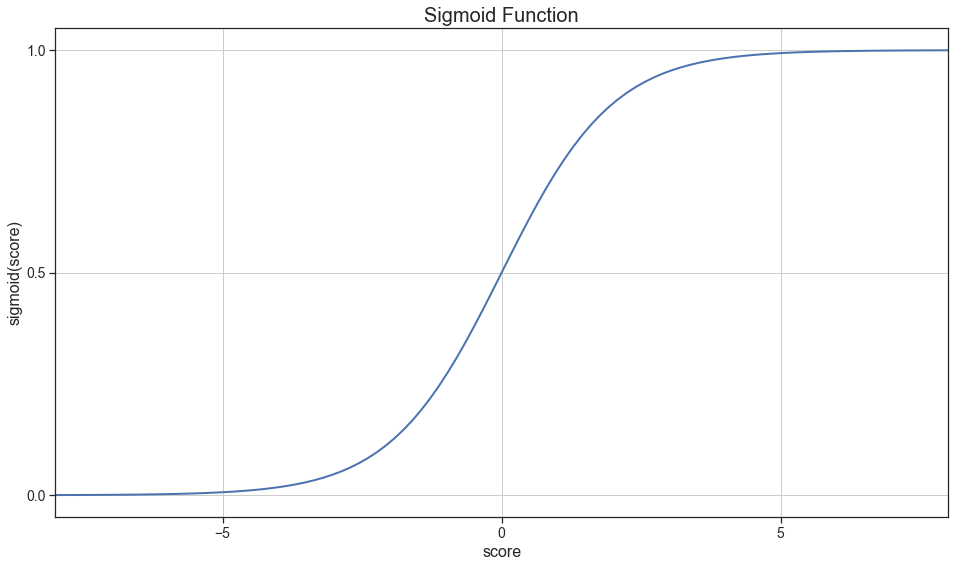

In [47]:
xs = np.linspace(-8, 8, 101)

plt.plot(xs, sigmoid(xs))
plt.title('Sigmoid Function')
plt.xlabel('score')
plt.ylabel('sigmoid(score)')
plt.xticks([-5, 0, 5])
plt.yticks([0, 0.5, 1])
plt.xlim(xs.min(), xs.max())
plt.grid()

### Fitting the Model

Training the logistic regression model means learning the weights, $w$, by maximizing the [**likelihood**](https://en.wikipedia.org/wiki/Likelihood_function) of the training data. Wikipedia says that "Likelihood describes the plausibility, given specific observed data, of a parameter value of the statistical model which is assumed to describe that data." In other words, a likelihood is a measure of how likely a model parameterized by $w$ could have produced the training data $(X_{TR}, y_{TR})$.

The likelihood of _one particular data point_ $(x', y')$ is given as $L_{x',y'}(w) = P(y=y' \mid x', w)$ such that

$$
P(y' \mid x', w) = \left \{
    \begin{array}{lr}
    \dfrac{1}{1 + e^{-w^{\top}x'}} & \text{ for } y' = +1\\
    1-\dfrac{1}{1 + e^{-w^{\top}x'}} &\text{ for }  y' = -1
    \end{array}
    \right .
$$

By the laws of what is called a [_joint probability distribution_](https://en.wikipedia.org/wiki/Joint_probability_distribution) (of independent random variables), the likelihood for the entire training dataset is given as the product of the data-point likelihoods: 

$$L(w) = L_{X, y}(w) = \prod_{i=1}^n L_{x_i,y_i}(w) = \prod_{i=1}^n P(y_i \mid x_i, w).$$

Rephrased, this is saying that the likelihood a particular model specified by $w$ produced the data is the likelihood that it produced $(x_1, y_1)$ **and** $(x_2, y_2)$ **and** every other point in the data set.

Now, what we want is to find the model parameters that fit our training dataset the _best_. This means we need to look for the model parameters that maximize this likelihood! This is another **optimization problem**, similar to the one we solved for linear regression (do you remember what we did to solve it?). However, unlike that of linear regression, this one has no [closed-form](https://en.wikipedia.org/wiki/Closed-form_expression) solution — we have to use numerical optimization to solve it.

The algorithm to solve this is an iterative hill climbing technique also known as [_gradient ascent_](https://en.wikipedia.org/wiki/Gradient_descent) (or _descent_ if you have a minimization problem). 

> **Intuition**:  The algorithm starts with a random set of parameters and then iteratively updates the parameters following the direction of the gradient until the gradient is 0.
>
> **Challenge**: Check out the implementation we provided for you in `utility/util.py` (After doing the math (which requires _some_ calculus, everything turns out surprisingly simple — you only need a few lines of code.) 

Let's train a logistic regression model with our Iris data. As we mentioned previously, the optimization process for finding $w$ is a bit out of scope for our class, so instead of implementing it together, we have provided our own implementation, `fit`, for you to use.

**Try this!** Create a train/test split of `X_aug` and `y` (using the 80:20 ratio and a `random_state` of 4) and then use `fit` to train the model. Store the output of `fit` in the variable `w`.

In [54]:
from sklearn.model_selection import train_test_split
from utility.util import optimize_logistic as fit

# your code here
X_train, X_test, y_train, y_test = train_test_split(X_aug, y, test_size = 0.2, random_state = 4)
w = fit(X_train, y_train)

### Making Predictions

Given weights $w$ and points $X$ we can make predictions by computing $P(y=+1 \mid x)$. With this probability and a threshold, we can produce a predicted label by evaluating

$$P(y=+1 \mid x) > \text{threshold}.$$

**Try this!** Complete the `predict_probability` function below so that it computes $P(y=+1 \mid x)$.

In [57]:
from utility.util import sigmoid

def predict_probability(X, w):
    '''
    Computes the predicted probability of points in X given model parameters w
    '''
    # your code here
    p = sigmoid(- 1 * w * X)
    
    assert np.all(0 <= p) and np.all(p <= 1), 'Probability must be between 0 and 1'
    
    return p

**Try this!** Complete the `predict` function below so that it computes the predicted `labels` of points in `X` given parameters `w`. The threshold is provided as an argument to the function. Make sure that your labels are either `+1` or `-1`. 

In [58]:
def predict(X, w, threshold=0.5):
    '''
    Given the inputs X and model paramters w, computes the probability
    of a +1 and then converts that probability of being +1 into a hard
    label using the threshold (default = 0.5)
    '''
    assert np.all(X[:, 0] == 1), 'X needs to be augmented with a column of ones!'
    
    N = X.shape[0]
    
    # your code here
    
    
    assert isinstance(labels, np.ndarray), 'Labels should be returned as a NumPy array'
    assert labels.shape[0] == N, 'There should be the same number of labels as their are points in X'
    assert np.all(np.isin(np.unique(labels), np.array([-1, 1]))), 'Labels should be either +1 or -1'
    
    return labels

To test your implementation use the following parameters, provided by an all-knowing _oracle_. Make sure you understand what each of them corresponds to. The second and fifth predictions should be positive.

In [ ]:
sample_w = np.array([-0.09,  0.58, -0.83])
predict(X_aug[:5,:], sample_w)

In [ ]:
predict(X_aug[:5, :], np.array([-1,  0.58, -.5]))

Before we move on, let's take some time to consider how we might decide what decision threshold to use.

**Write-up!** Why does it make sense to use 0.5? Can you think of any scenarios where you might want to use a different threshold?

### Visualizing the Result
We can now visualize the decision boundary and the prediction results. In the cell below, we have provided the code for scattering the training set as well as plotting the decision boundary. Fill in the scatter plots for the testing set in addition to adding plot description components.

**Try this!** Create a scatter plot that shows `+1` and `-1` examples in different colors and with different marker shapes for the testing sets. We have provided `y_pred` which contains the predicted labels for the points in `X_test`. Include appropriate axes labels, a legend, and a title. Check your plot with your neighbors and a TA (for a quick sanity check). _**Hint**: you will make 4 calls to `plt.scatter`_.

In [ ]:
y_pred = predict(X_test, w)

# training data scatters
plt.scatter(X_train[y_train > 0, 1], X_train[y_train > 0, 2], marker='^', color='lightgray', label='train $+1$')
plt.scatter(X_train[y_train < 0, 1], X_train[y_train < 0, 2], marker='s', color='lightgray', label='train $-1$')

# your code here



# Plot the decision boundary (pretty complicated plot - feel free to ignore)
A, B = np.meshgrid(np.linspace(X_aug[:, 1].min(), X_aug[:, 1].max()),
                   np.linspace(X_aug[:, 2].min(), X_aug[:, 2].max()))
xs = add_intercept(np.c_[A.ravel(), B.ravel()])
ps = predict_probability(xs, w).reshape(A.shape)
plt.contour(A, B, ps, [0.5], linewidths=1, colors='black');

### Evaluating the Model

Luckily, the most simple measure of classification model performance is incredibly intuitive. We simply count the number of mistakes we made.

**Try this!** Complete the `accuracy` function below so that it computes the accuracy of the `predictions` relative to the `labels`.

In [ ]:
def accuracy(predictions, labels):
    '''Computes the accuracy of the predictions'''
    
    N, = labels.shape
    
    # your code here

    
    assert 0 <= result <= 1, 'the result should be between 0 and 1'
    
    return result

Now, let's check the performance of our model on our test set.

In [ ]:
f'Accuracy: {accuracy(y_pred, y_test):0.2%}'

Nice!